In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
#데이터셔플
from sklearn.metrics import mean_squared_error
# mse 계산

In [2]:
data = "./data/weight-height.csv"
df_weight_height = pd.read_csv(data)

In [3]:
df_weight_height.head()

,Gender,Height,Weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856
3,Male,71.730978,220.042470
4,Male,69.881796,206.349801


In [4]:
df_weight_height["Height"] = 2.54*df_weight_height["Height"]
df_weight_height["Weight"] = 0.4563*df_weight_height["Weight"]

In [ ]:
df_weight_height["Height"] = df_weight_height["Height"].apply(lambda x: x * 2.54)
df_weight_height["Weight"] = df_weight_height["Weight"].apply(lambda x: x * 0.4563)

In [5]:
df_weight_height.head()

,Gender,Height,Weight
0,Male,187.571423,110.376033
1,Male,174.706036,74.062269
2,Male,188.239668,97.073652
3,Male,182.196685,100.405379
4,Male,177.499761,94.157414


In [6]:
df_weight_height.shape

(10000, 3)

In [7]:
df_weight_height.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Gender  10000 non-null  object 
 1   Height  10000 non-null  float64
 2   Weight  10000 non-null  float64
dtypes: float64(2), object(1)
memory usage: 234.5+ KB


In [8]:
df_weight_height.describe()

,Height,Weight
count,10000.000000,10000.000000
mean,168.573602,73.665235
std,9.772721,14.651081
min,137.828359,29.522668
25%,161.304276,61.973777
50%,168.447898,73.561459
75%,175.702625,85.405454
max,200.656806,123.196299


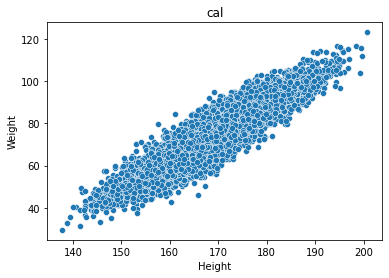

In [11]:
# 입력데이터와 정답데이터를 분리하세요.
# X =  # 입력데이터
# y =  # 정답데이터
sns.scatterplot(data=df_weight_height, x='Height', y='Weight')
plt.title('cal')
# seaborn으로 다음의 차트가 그려보세요.
plt.show()

In [13]:
X = df_weight_height["Height"]
y = df_weight_height["Weight"]

In [37]:
# shuffle = True, random_state=40 
# 40번 섞는다
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle = True, random_state=40 )
X_train, X_test

(4318    164.923546
 471     174.666051
 9656    160.290068
 8243    166.353566
 9984    149.979453
            ...    
 7839    164.732365
 3603    165.079450
 5959    147.442905
 5426    147.124825
 7608    160.306738
 Name: Height, Length: 8000, dtype: float64,
 293     177.543978
 1244    175.464666
 7353    162.396670
 5145    158.876608
 1618    189.569921
            ...    
 5361    154.838773
 7365    152.433217
 1162    166.312151
 9434    162.625640
 4398    181.405636
 Name: Height, Length: 2000, dtype: float64)

In [39]:
model_lr = LinearRegression()
model_lr

LinearRegression()

In [40]:
model_lr.fit(X_train.values.reshape(-1,1), y_train)

LinearRegression()

In [41]:
X_train

4318    164.923546
471     174.666051
9656    160.290068
8243    166.353566
9984    149.979453
           ...    
7839    164.732365
3603    165.079450
5959    147.442905
5426    147.124825
7608    160.306738
Name: Height, Length: 8000, dtype: float64

In [42]:
y_pred = model_lr.predict(X_test.values.reshape(-1,1))


In [43]:
y_pred

array([86.14803344, 83.26061043, 65.11382128, ..., 70.55102825,
       65.4317782 , 91.51050019])

In [44]:
print(X_test.values)
print(X_test.values.reshape(-1,1))

[177.54397803 175.46466627 162.39667038 ... 166.31215084 162.6256398
 181.40563603]
[[177.54397803]
 [175.46466627]
 [162.39667038]
 ...
 [166.31215084]
 [162.6256398 ]
 [181.40563603]]


In [34]:
my_h= pd.Series([180])
print(my_h)
model_lr.predict(my_h.values.reshape(-1,1))


0    180
dtype: int64


array([89.47448278])

In [45]:
# MSE(Mean Squared Error)를 측정하기
MSE = mean_squared_error(y_test, y_pred)


# RMSE(Root Mean Squared Error)를 측정하기
RMSE = np.sqrt(MSE)

print('MSE :', MSE)
print('RMSE :', RMSE)

# 결과는 도메인마다 다름
# MSE : 30.852657924863387
# RMSE : 5.554516893921863
# no shuffle


# MSE : 32.461898211431375
# RMSE : 5.697534397564562

MSE : 32.461898211431375
RMSE : 5.697534397564562


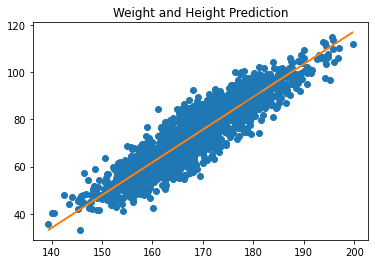

In [47]:
plt.plot(X_test, y_test,'o')
plt.plot(X_test, y_pred)
plt.title('Weight and Height Prediction')
plt.show()